In [1]:
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import plotly.express as px
import matplotlib.pyplot as plt

#Machine Learning
import statsmodels.api as sm

In [2]:
df=pd.read_csv("C:\\Users\\Saravanan\\OneDrive\\Desktop\\Datasets_data\\slr.csv")

In [3]:
df

,Exam,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


# DataSet Observation

Dependent column - GPA

Independent column - Exam

Continuous column - Exam,GPA

Supervised Regression

# Data Cleaning

Handling Null Values

Handling Duplicated Values

Data Type Conversation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exam    84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [5]:
df.isnull().sum()

Exam    0
GPA     0
dtype: int64

# Hypothesis Testing/Statistical Analysis



In [6]:
df.corr()

,Exam,GPA
Exam,1.000000,0.637184
GPA,0.637184,1.000000


# Central Limit Theoram

In [7]:
Population=df.Exam.values
sample_mean=[]
for i in range(15):
    sample=np.random.choice(Population,20)
    sample_mean.append(sample.mean())
np.mean(sample_mean),Population.mean()

(1854.1466666666665, 1845.2738095238096)

In [8]:
population=df.GPA.values
sample_mean=[]
for i in range(15):
    sample=np.random.choice(population,20)
    sample_mean.append(sample.mean())
np.mean(sample_mean),population.mean()

(3.3588666666666667, 3.330238095238095)

# 2 Tailed Test 

In [9]:
h0=0
ha=0
for i in range(20):
    sample1=df.Exam.sample(frac=0.05)
    sample2=df.GPA.sample(frac=0.05)
    t_test,p_value=stats.ttest_ind(sample1,sample2)

    if p_value>0.05:
        h0=+1
    else:
        ha=+1
print("H0 Accepted :",h0,"H0 Rejected :",ha)

H0 Accepted : 0 H0 Rejected : 1


# Data Visualization

In [10]:
correlation_matrix=df.corr()
fig=px.imshow(correlation_matrix,color_continuous_scale='Viridis',title="Correlation Matrix")
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': array(['Exam', 'GPA'], dtype=object),
              'xaxis': 'x',
              'y': array(['Exam', 'GPA'], dtype=object),
              'yaxis': 'y',
              'z': array([[1.        , 0.63718436],
                          [0.63718436, 1.        ]])}],
    'layout': {'coloraxis': {'colorscale': [[0.0, '#440154'], [0.1111111111111111,
                                            '#482878'], [0.2222222222222222,
                                            '#3e4989'], [0.3333333333333333,
                                            '#31688e'], [0.4444444444444444,
                                            '#26828e'], [0.5555555555555556,
                                            '#1f9e89'], [0.6666666666666666,
                             

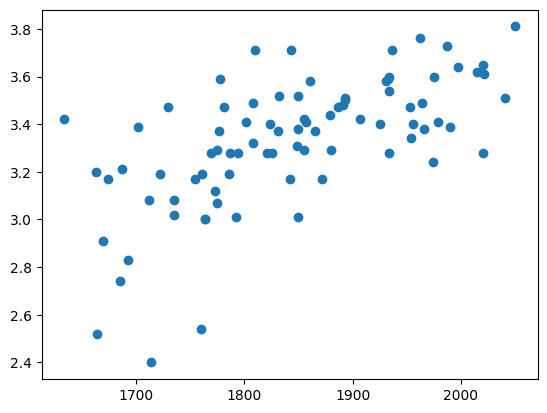

In [11]:
plt.scatter(x = df.Exam, y = df.GPA, )
plt.show()

# Machine Learning

 1 data availability

 2 separating independent and dependent 

 3 identifying algorithms/Model

 4 training
 
 5 evaluation

In [12]:
df.head()

,Exam,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [13]:
x1=df.Exam
y=df.GPA
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()

In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           7.20e-11
Time:                        13:07:44   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
Exam           0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
y_hat=result.params[0]+result.params[1]*x1
y_hat

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_21864\2934177627.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0     3.112890
1     3.030105
2     3.189051
3     3.064875
4     3.078120
        ...   
79    3.480452
80    3.271836
81    3.564892
82    3.523500
83    3.669201
Name: Exam, Length: 84, dtype: float64

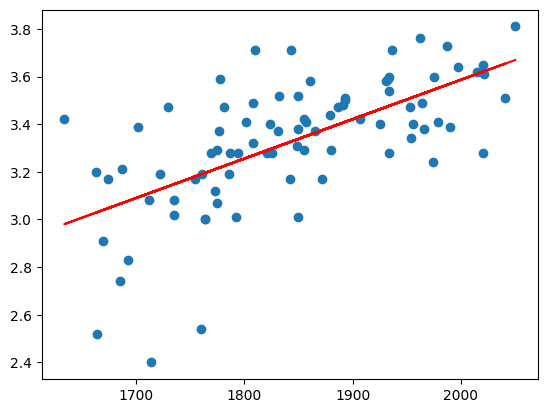

In [16]:
plt.scatter(x1, y)
plt.plot(x1,y_hat, color = 'red')
plt.show()